<a href="https://colab.research.google.com/github/EbunoluwaArimoro/DSN_AI_Bootcamp25/blob/main/Predicting_Youth_Unemployment_in_Africa_DSNAI_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/lekanakin/DSN_AI_Bootcamp25/blob/main/notebooks/Predicting_Youth_Unemployment_in_Africa_DSNAI_Bootcamp.ipynb)


# Building Your First Predictive Model from Scratch  
**Predicting Youth Unemployment in Africa (with Python) by Olalekan Akinsande** — [lekanakinsande.com](https://lekanakinsande.com)

This notebook guides you through:
1. Loading and exploring a real-world themed dataset (synthetic values for demo purposes).
2. Training a simple **Linear Regression** model.
3. Evaluating performance.
4. Making new predictions — including an **interactive slider UI**.

> **Note:** The CSV file (`youth_unemployment_africa.csv`) is provided alongside this notebook.  
> - If running in **Colab**, upload the CSV when prompted.  
> - Or host it on GitHub and paste the raw URL.


In [1]:
#Import the Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from pathlib import Path

import sys
print(sys.version)


3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]



## 1) Load the Dataset
Two options:
- **Upload** the CSV from your computer (works well in Colab)
- **Use a URL** to a raw CSV (e.g., hosted on GitHub)


In [3]:
# Hosted on GitHub (Colab-friendly)
url = "https://raw.githubusercontent.com/lekanakin/DSN_AI_Bootcamp25/main/youth_unemployment_africa.csv"
data = pd.read_csv(url)

# Optional local fallback (for running outside Colab)
# local_path = Path("data/youth_unemployment_africa.csv")
# if local_path.exists():
#     data = pd.read_csv(local_path)


In [ ]:

# Option B: Upload in Colab
# from google.colab import files
# uploaded = files.upload()  # Choose youth_unemployment_africa.csv
# import io
# data = pd.read_csv(io.BytesIO(uploaded['youth_unemployment_africa.csv']))


In [7]:
# Option C: Use a URL or local fallback
# url = None  # paste a URL string here when hosted

# local_path = Path("youth_unemployment_africa.csv")
# if url:
#     data = pd.read_csv(url)
# elif local_path.exists():
#     data = pd.read_csv(local_path)
# else:
#     data = pd.read_csv("/mnt/data/youth_unemployment_africa.csv")

# Assuming 'data' DataFrame is already loaded from a previous cell (e.g., from URL)
# If not, uncomment one of the loading options above or run the appropriate cell.

data.head()

,Country,Year,GDP_Per_Capita,Education_Index,Urban_Population_Percent,Youth_Unemployment_Rate
0,Nigeria,2021,3434.14,0.735,59.7,9.0
1,Kenya,2021,1838.76,0.467,67.4,17.2
2,Ghana,2021,5088.14,0.662,19.2,7.6
3,South Africa,2021,2038.85,0.541,47.9,13.9
4,Rwanda,2021,3853.20,0.537,52.9,11.5



## 2) Explore the Data (EDA)
Let's understand columns, ranges, and relationships.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   40 non-null     object 
 1   Year                      40 non-null     int64  
 2   GDP_Per_Capita            40 non-null     float64
 3   Education_Index           40 non-null     float64
 4   Urban_Population_Percent  40 non-null     float64
 5   Youth_Unemployment_Rate   40 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.0+ KB


,Country,Year,GDP_Per_Capita,Education_Index,Urban_Population_Percent,Youth_Unemployment_Rate
count,40,40.0,40.000000,40.000000,40.000000,40.000000
unique,40,NaN,NaN,NaN,NaN,NaN
top,Nigeria,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,2021.0,4252.018000,0.584575,45.735000,11.402500
std,NaN,0.0,2256.927683,0.088989,16.800695,4.270921
min,NaN,2021.0,951.040000,0.459000,18.400000,3.000000
25%,NaN,2021.0,2280.447500,0.513000,32.700000,8.025000
50%,NaN,2021.0,3883.155000,0.567500,46.900000,11.350000
75%,NaN,2021.0,6243.655000,0.670500,61.750000,15.175000


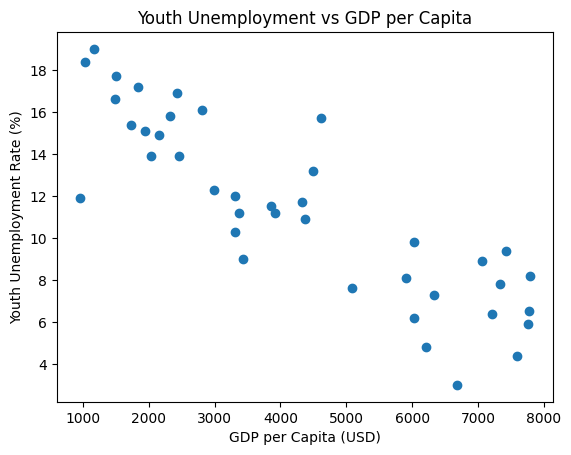

In [8]:
data.info()
display(data.describe(include='all'))

# Quick scatter: GDP vs Youth Unemployment
plt.figure()
plt.scatter(data['GDP_Per_Capita'], data['Youth_Unemployment_Rate'])
plt.title('Youth Unemployment vs GDP per Capita')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Youth Unemployment Rate (%)')
plt.show()


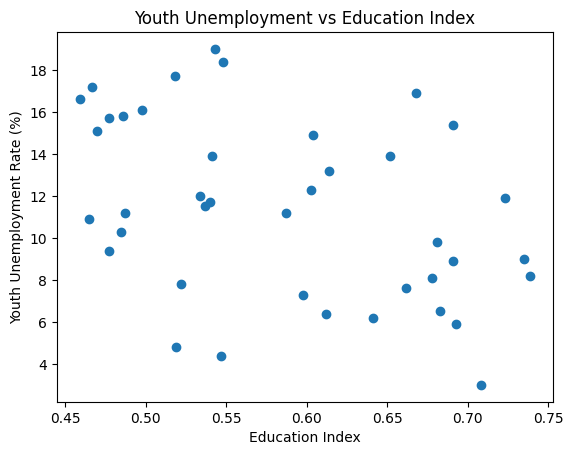

In [9]:
# Quick scatter: Education Index vs Youth Unemployment
plt.figure()
plt.scatter(data['Education_Index'], data['Youth_Unemployment_Rate'])
plt.title('Youth Unemployment vs Education Index')
plt.xlabel('Education Index')
plt.ylabel('Youth Unemployment Rate (%)')
plt.show()


## 3) Build the Predictive Model
We predict `Youth_Unemployment_Rate` using:
- `GDP_Per_Capita`
- `Education_Index`
- `Urban_Population_Percent`


In [14]:
#Separte the Features and Target
X = data[['GDP_Per_Capita', 'Education_Index', 'Urban_Population_Percent']]
y = data['Youth_Unemployment_Rate']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=20
)

In [15]:
#Fit the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-1.57770658e-03 -1.18676266e+01 -1.43520842e-02]
Intercept: 25.747169226391318


### Interpreting Coefficients (Plain-English)

**Intuition**
- **Negative GDP coefficient:** as **GDP per capita** increases, **predicted unemployment decreases** (holding other features constant).
- **Negative Education Index coefficient:** **higher education** → **lower predicted unemployment** (all else equal).
- **Urbanization coefficient:** can be **ambiguous**; may reflect structural shifts, informal sector size, or service opportunities.

**Intercept (what it means)**
- The **intercept** is the model’s predicted value when **all features = 0**.
- In practice, this can be **not economically meaningful** (e.g., GDP=0, Education Index=0, Urbanization=0 are outside real ranges), but it’s needed mathematically to position the regression plane.
- Tip: If you **center** features (subtract their means), the intercept becomes the **predicted unemployment at average feature values**, which is easier to interpret.

**Units intuition**
- If the GDP coefficient is **−0.002**, that’s roughly **−2.0 percentage points per +$1,000** in GDP per capita  
  (because −0.002 × 1000 = −2).  
  *Always translate coefficients into meaningful units.*

**One-line caveat**
- Linear regression assumes **roughly linear relationships** and **not-too-strong collinearity**; today is about **workflow**, not perfect econometrics.



## 4) Evaluate the Model
- **Mean Absolute Error (MAE)**
- **R² Score**


In [16]:

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 1.74
R² Score: 0.74


### Evaluate (MAE & R²)

**Run:** Calculate **Mean Absolute Error (MAE)** and **R² (coefficient of determination)**.

**Explain simply**
- **MAE:** “On average, how far off are we?”  
  *Example:* If **MAE = 3.0**, our predictions miss by **~3 percentage points** on average.
- **R²:** “How much of the variation in unemployment do our features explain?”  
  *Example:* **R² = 0.70** → the model explains **70% of the story**.



### Visual Check: Predicted vs Actual


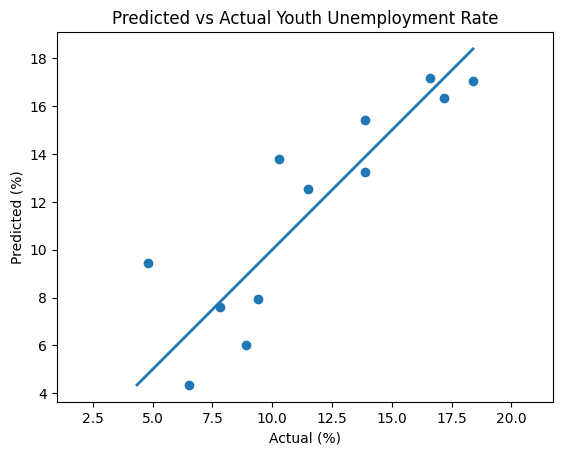

In [19]:
import numpy as np

# Compute a common range for the diagonal reference line
lo = min(np.min(y_test), np.min(y_pred))
hi = max(np.max(y_test), np.max(y_pred))

plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([lo, hi], [lo, hi], linewidth=2)  # 45° reference line (perfect predictions)
plt.title('Predicted vs Actual Youth Unemployment Rate')
plt.xlabel('Actual (%)')
plt.ylabel('Predicted (%)')
plt.axis('equal')  # optional: makes the diagonal truly 45° on-screen
plt.show()




## 5) Make a New Prediction (Manual)
Try a hypothetical country profile.


In [20]:

sample = [[2500, 0.58, 45.0]]  # [GDP_Per_Capita, Education_Index, Urban_Population_Percent]
pred = model.predict(sample)[0]
print(f"Predicted Youth Unemployment Rate: {pred:.2f}%")


Predicted Youth Unemployment Rate: 14.27%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



## 5b) Interactive Prediction UI

Use the sliders to simulate a country profile and get a predicted **Youth Unemployment Rate (%)**.

> If you're running in **Google Colab**, the widgets work out-of-the-box.  
> In plain Jupyter, ensure `ipywidgets` is installed and enabled.


In [21]:

from ipywidgets import FloatSlider, VBox, HBox, Button, Output, Layout, Dropdown, Label
import ipywidgets as widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'data' exists (loaded earlier). Create a lookup for country -> feature values.
try:
    _ = data[['Country','GDP_Per_Capita','Education_Index','Urban_Population_Percent']]
except Exception as e:
    raise RuntimeError("Dataset 'data' not found. Please run the loading cells above first.") from e

# If multiple rows per country exist, take the latest or mean; here we take the mean for robustness.
country_lookup = (
    data.groupby('Country')[['GDP_Per_Capita','Education_Index','Urban_Population_Percent']]
    .mean()
    .round({'GDP_Per_Capita':2,'Education_Index':3,'Urban_Population_Percent':1})
    .to_dict('index')
)

# Fallback retrain if model/X_train are missing- quick retrain
try:
    model
    X_train
except NameError:
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    X = data[['GDP_Per_Capita', 'Education_Index', 'Urban_Population_Percent']]
    y = data['Youth_Unemployment_Rate']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LinearRegression().fit(X_train, y_train)

# Defaults
DEFAULTS = dict(gdp=2500.0, edu=0.58, urban=45.0)

# Controls
country_dd = Dropdown(
    options=['-- Select Country --'] + sorted(country_lookup.keys()),
    value='-- Select Country --',
    description='Country',
    layout=Layout(width='95%')
)

gdp_slider = FloatSlider(
    value=DEFAULTS['gdp'], min=500.0, max=10000.0, step=50.0,
    description='GDP/Capita ($)', continuous_update=False, readout_format='.0f',
    layout=Layout(width='95%')
)

edu_slider = FloatSlider(
    value=DEFAULTS['edu'], min=0.40, max=0.85, step=0.01,
    description='Education Idx', continuous_update=False, readout_format='.2f',
    layout=Layout(width='95%')
)

urban_slider = FloatSlider(
    value=DEFAULTS['urban'], min=10.0, max=90.0, step=1.0,
    description='Urban (%)', continuous_update=False, readout_format='.0f',
    layout=Layout(width='95%')
)

predict_btn = Button(description='Predict Youth Unemployment (%)', button_style='primary', layout=Layout(width='47%'))
reset_btn = Button(description='Reset', layout=Layout(width='47%'))
buttons_row = HBox([predict_btn, reset_btn], layout=Layout(width='95%', justify_content='space-between'))

out = Output(layout=Layout(border='1px solid #ddd', padding='8px', width='95%'))

def plot_meter(pred_value, ymin=0, ymax=50):
    """Simple meter-style visualization: a horizontal axis with a marker at the prediction."""
    plt.figure()
    plt.axhline(0)
    plt.xlim(ymin, ymax)
    plt.ylim(-1, 1)
    plt.xticks(range(ymin, ymax+1, 5))
    plt.axvline(pred_value)
    plt.title('Predicted Youth Unemployment Rate (Meter)')
    plt.xlabel('Rate (%)')
    plt.yticks([])
    plt.show()

def on_predict_clicked(b):
    with out:
        out.clear_output()
        sample = [[gdp_slider.value, edu_slider.value, urban_slider.value]]
        pred = model.predict(sample)[0]
        print(f"Predicted Youth Unemployment Rate: {pred:.2f}%")
        try:
            train_mean = float(pd.Series(model.predict(X_train)).mean())
            print(f"(Context) Avg predicted (train set): {train_mean:.2f}%")
        except Exception:
            pass
        plot_meter(pred_value=float(pred), ymin=0, ymax=50)

def on_reset_clicked(b):
    country_dd.value = '-- Select Country --'
    gdp_slider.value = DEFAULTS['gdp']
    edu_slider.value = DEFAULTS['edu']
    urban_slider.value = DEFAULTS['urban']
    with out:
        out.clear_output()
        print("Controls reset to defaults.")

def on_country_change(change):
    if change['name'] == 'value' and change['new'] != '-- Select Country --':
        vals = country_lookup.get(change['new'])
        if vals:
            gdp_slider.value = float(vals['GDP_Per_Capita'])
            edu_slider.value = float(vals['Education_Index'])
            urban_slider.value = float(vals['Urban_Population_Percent'])

country_dd.observe(on_country_change, names='value')
predict_btn.on_click(on_predict_clicked)
reset_btn.on_click(on_reset_clicked)

VBox([country_dd, gdp_slider, edu_slider, urban_slider, buttons_row, out])



## 6) Reflection & Next Steps
- Add more features: internet penetration, access to finance, sectoral shares.
- Try new algorithms: Decision Trees, Random Forests.
- Perform cross-validation and hyperparameter tuning.
- Share insights with policymakers and communities.


## Thank You